In [10]:
import cv2
import numpy as np


def crop_image_from_gray(img, tol=7):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = gray_img > tol
    img1 = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))]
    img2 = img[:, :, 1][np.ix_(mask.any(1), mask.any(0))]
    img3 = img[:, :, 2][np.ix_(mask.any(1), mask.any(0))]
    img = np.stack([img1, img2, img3], axis=-1)
    return img


def circle_crop(img):
    img = crop_image_from_gray(img)
    height, width, depth = img.shape
    largest_side = np.max((height, width))
    img = cv2.resize(img, (largest_side, largest_side))
    height, width, depth = img.shape
    x, y = int(width / 2), int(height / 2)
    r = min(x, y)
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x, y), r, 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    return img


def load_ben_color(path, IMG_SIZE, sigmaX=30):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0, 0), sigmaX), -4, 128)
    image = circle_crop(image)
    return image

In [11]:
DIR_ORIGIN = "Data/Resized/organized_2019/"
DIR_TARGET = "xd/"
import os

directories = ["Mild", "Moderate", "No_DR", "Proliferate_DR", "Severe"]

for directory in directories:
    files = os.listdir(DIR_ORIGIN + directory)
    os.makedirs(DIR_TARGET + directory, exist_ok=True)
    for i, file in enumerate(files):
        print(
            "Processing " + str(i) + " / " + str(len(files)) + f" {directory}", end="\r"
        )
        img = load_ben_color(DIR_ORIGIN + directory + "/" + file, IMG_SIZE=224)
        cv2.imwrite(DIR_TARGET + directory + "/" + os.path.basename(file), img)
        break
    print("Done " + directory)

Done Mildg 0 / 370 Mild
Done Moderate/ 999 Moderate
Done No_DR 0 / 1805 No_DR
Done Proliferate_DRProliferate_DR
Done Severe0 / 193 Severe


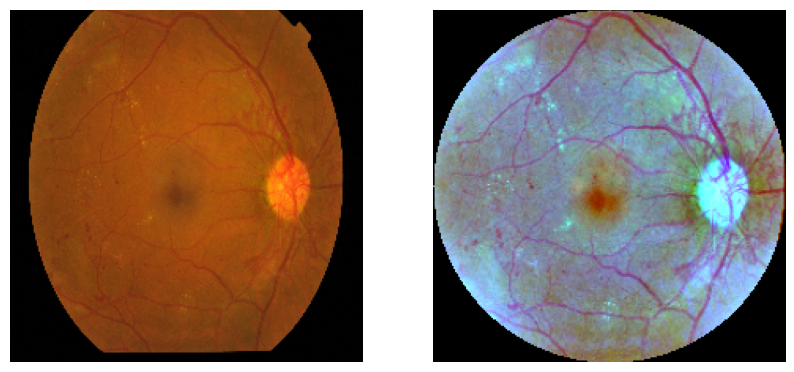

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
path_img = DIR_ORIGIN + "Proliferate_DR/" + "1a90fad9ffa2.png"
img1 = cv2.imread(path_img)
ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
img2 = load_ben_color(path_img, IMG_SIZE=224)
ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[0].axis("off")
ax[1].axis("off")
plt.show()

(224, 224, 3)


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type


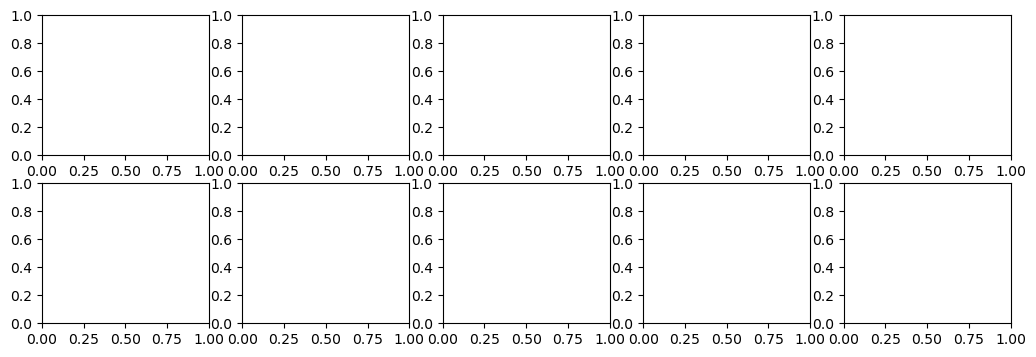

In [ ]:
def show_examples(ncols=6):
    fig, ax = plt.subplots(nrows=2, ncols=ncols, figsize=(ncols * 2.5, 4))
    for i in range(ncols):
        directory = random.choice(directories)
        files = os.listdir(DIR_ORIGIN + directory)
        file = random.choice(files)
        img1 = cv2.imread(DIR_ORIGIN + directory + "/" + file)
        img2 = ben_preprocess(DIR_ORIGIN + directory + "/" + file)
        ax[0, i].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        ax[1, i].imshow(img2, cmap="gray")
        file_path = directory + "/" + file
        ax[0, i].set_title(f"Original\n{file_path}", fontsize=8)
        ax[1, i].set_title("Preprocessed", fontsize=8)
        ax[0, i].axis("off")
        ax[1, i].axis("off")
    plt.show()


show_examples(5)